In [1]:
import itertools
from math import sqrt
import multiprocessing as mp
from multiprocessing import Pool
#mp.set_start_method('spawn')

import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt

import numpy as np

font = {'family' : 'Source Code Pro',
        'size'   : 15}

matplotlib.rc('font', **font)
matplotlib.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"]=8,15

Defines and evaluates denominators in the RG equations. The denominators in the RG equations are

$d_0 = \omega - \frac{1}{2}D - \frac{U}{2} + \frac{K}{2}$

$d_1 = \omega - \frac{1}{2}D + \frac{U}{2} + \frac{J}{2}$

$d_2 = \omega - \frac{1}{2}D + \frac{J}{4} + \frac{K}{4}$

In [2]:
def den(w, D, U, J, K):
    d0 = w - 0.5 * D - U/2 + K/2
    d1 = w - 0.5 * D + U/2 + J/2
    d2 = w - 0.5 * D + J/4 + K/4
    return d0, d1, d2

The RG equations for the symmetric spin-charge Anderson-Kondo are 

$\Delta U = 4|V|^2 (\frac{1}{\omega - \frac{\epsilon_q}{2} + \frac{U}{2} + \frac{1}{2}J}  - \frac{1}{\omega - \frac{\epsilon_q}{2} - \frac{U}{2} + \frac{1}{2}K}) + \sum_{k<\Lambda_j} \frac{3}{4}\frac{K^2 - J^2}{\omega - \frac{\epsilon_q}{2} + \frac{1}{4}J + \frac{1}{4}K}$

$\Delta V = \frac{V K}{16}\left( \frac{1}{\omega - \frac{\epsilon_q}{2} - \frac{U}{2} + \frac{1}{2}K} + \frac{1}{\omega - \frac{\epsilon_q}{2} + \frac{1}{4}J + \frac{1}{4}K} \right) - \frac{3VJ}{4}\left( \frac{1}{\omega - \frac{\epsilon_q}{2} + \frac{U}{2} + \frac{1}{2}J} + \frac{1}{\omega - \frac{\epsilon_q}{2} + \frac{1}{4}J + \frac{1}{4}K} \right)$

$\Delta J = - \frac{J^2}{\omega - \frac{\epsilon_q}{2} + \frac{1}{4}J + \frac{1}{4}K}$

$\Delta K = - \frac{K^2}{\omega - \frac{\epsilon_q}{2} + \frac{1}{4}J + \frac{1}{4}K}$

The following equation accepts the coupling values at the $j^{th}$ step of the RG, applies the RG equations on them and returns the couplings for the $(j-1)^{th}$ step. _If any coupling changes sign, it is set to 0._

In [3]:

def rg(w, D, U, V, J, K):
    dens = den(w, D, U, J, K)
    deltaU = -4 * V**2 * (1/dens[0] - 1/dens[1]) - (3* (J**2 - K**2)/8) * D / dens[2]
    deltaV = (1/16) * K * V * (1/dens[0] - 1/dens[2]) - (3/4) * J * V * (1/dens[1] + 1/dens[2])
    deltaJ = - J**2 / dens[2]
    deltaK = - K**2 / dens[2]

    U = 0 if (U + deltaU) * U <= 0 else U + deltaU
    V = 0 if (V + deltaV) * V <= 0 else V + deltaV
    J = 0 if (J + deltaJ) * J <= 0 else J + deltaJ
    K = 0 if (K + deltaK) * K <= 0 else K + deltaK

    return U, V, J, K

# 1. $V=0$:

First we will look at the simplified case of $V=0$. Since the RG equation for $V$ involves $V$, it will not flow. We need to look only at $U$, $J$ and $K$. Depending on the value of $\omega$, the denominator can be either positive or negative. We look at the two cases separately.

In [20]:
def zero_V_complete_RG(w, D0, U0, J0, K0):
    U = U0
    V = 0
    J = J0
    K = K0
    N = D0 * 10
    old_den = den(w, D0, U, J, K)[2]
    x, y1, y2, y3 = [], [], [], []
    for D in np.linspace(D0, 0, N):
        x.append(D)
        y1.append(U)
        y2.append(J)
        y3.append(K)
        new_den = den(w, D, U, J, K)[2]
        if old_den * new_den <= 0:
            return x, y1, y2, y3
        old_den = new_den
        U, V, J, K = rg(w, D, U, V, J, K)
    return x, y1, y2, y3

### a. $\omega - \frac{\epsilon_q}{2} + \frac{1}{4}J + \frac{1}{4}K>0$ (high $\omega$):

These aren't truly URG fixed points because the denominator will not converge towards zero.

#### i. $J=K$

Since $\Delta U \propto K^2 - J^2$, $U$ will be marginal here.

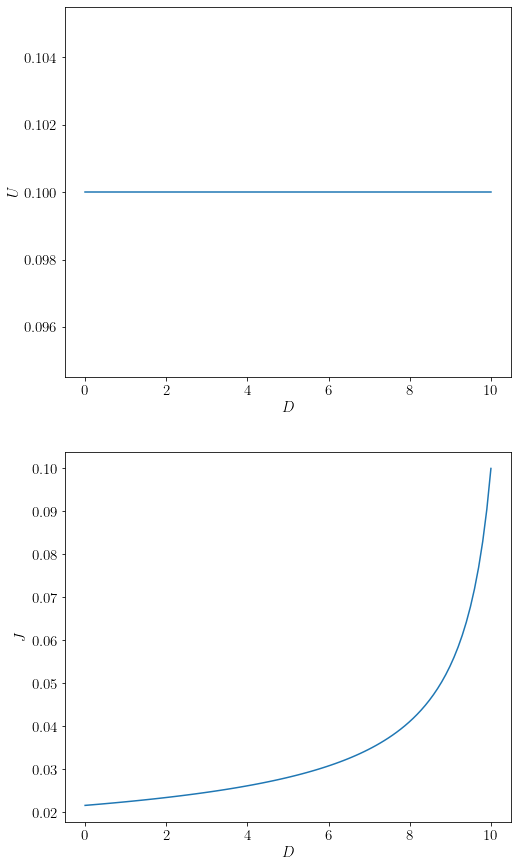

In [21]:
w = 6
D0 = 10
U0 = J0 = K0 = 0.1
x, y1, y2, y3 = zero_V_complete_RG(w, D0, U0, J0, K0)
fig, ax = plt.subplots(nrows=2)
ax[0].set_ylabel(r'$U$')
ax[1].set_ylabel(r'$J$')
ax[0].set_xlabel(r'$D$')
ax[1].set_xlabel(r'$D$')
ax[0].plot(x, y1)
ax[1].plot(x, y2)
plt.show()

#### ii. $J > K$

Since $\Delta U \propto K^2 - J^2$, $U$ will be irrelevant here.

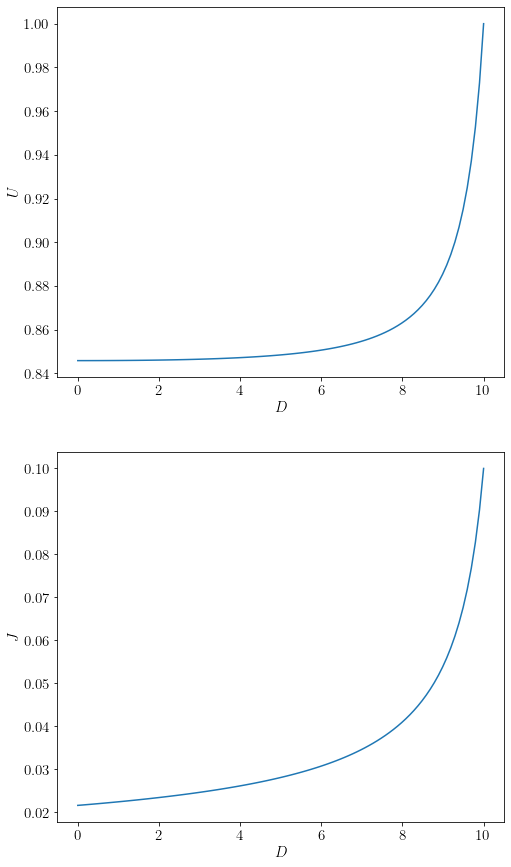

In [22]:
w = 6
D0 = 10
U0 = 1
J0 = 0.1
K0 = 0.05
x, y1, y2, y3 = zero_V_complete_RG(w, D0, U0, J0, K0)
fig, ax = plt.subplots(nrows=2)
ax[0].set_ylabel(r'$U$')
ax[1].set_ylabel(r'$J$')
ax[0].set_xlabel(r'$D$')
ax[1].set_xlabel(r'$D$')
ax[0].plot(x, y1)
ax[1].plot(x, y2)
plt.show()

#### iii. $J < K$

Since $\Delta U \propto K^2 - J^2$, $U$ will be relevant here.

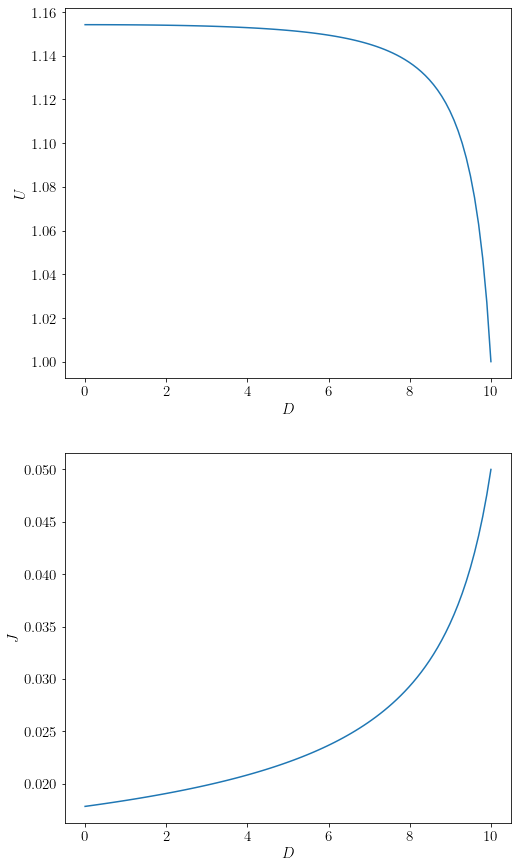

In [23]:
w = 6
D0 = 10
U0 = 1
J0 = 0.05
K0 = 0.1
x, y1, y2, y3 = zero_V_complete_RG(w, D0, U0, J0, K0)
fig, ax = plt.subplots(nrows=2)
ax[0].set_ylabel(r'$U$')
ax[1].set_ylabel(r'$J$')
ax[0].set_xlabel(r'$D$')
ax[1].set_xlabel(r'$D$')
ax[0].plot(x, y1)
ax[1].plot(x, y2)
plt.show()

### b. $\omega - \frac{\epsilon_q}{2} + \frac{1}{4}J + \frac{1}{4}K<0$ (low $\omega$):

This is the regime where we achieve true strong-coupling fixed points in $J,K$. The signature of $K^2 - J^2$ will determine whether $U$ is relevant or irrelevant.

#### i. $J>K$

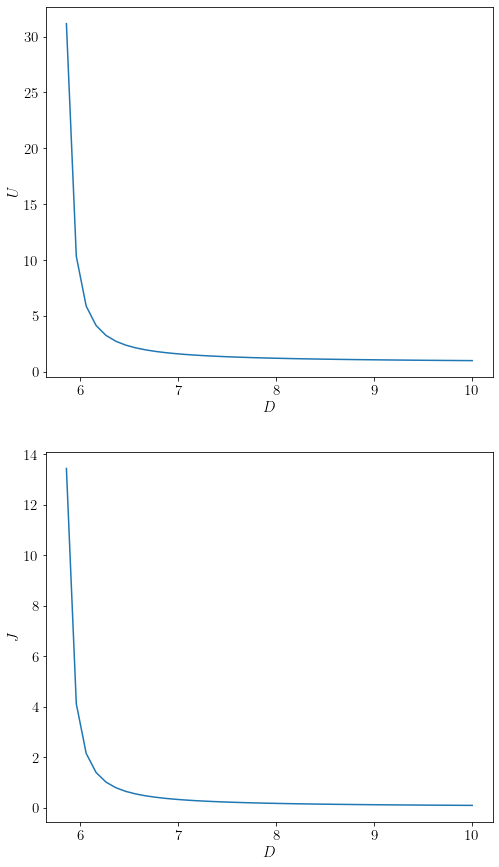

In [24]:
w = 0.1
D0 = 10
U0 = 1
J0 = 0.1
K0 = 0.05
x, y1, y2, y3 = zero_V_complete_RG(w, D0, U0, J0, K0)
fig, ax = plt.subplots(nrows=2)
ax[0].set_ylabel(r'$U$')
ax[1].set_ylabel(r'$J$')
ax[0].set_xlabel(r'$D$')
ax[1].set_xlabel(r'$D$')
ax[0].plot(x, y1)
ax[1].plot(x, y2)
plt.show()

#### i. $J<K$

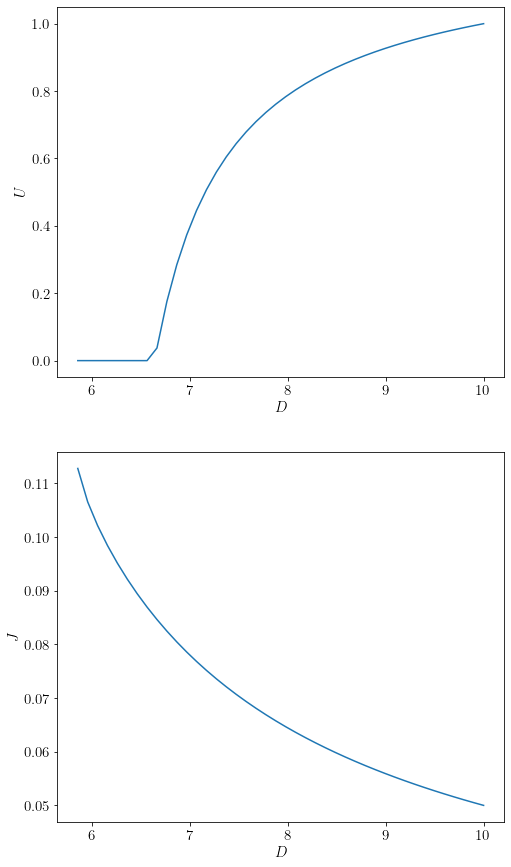

In [25]:
w = 0.1
D0 = 10
U0 = 1
J0 = 0.05
K0 = 0.1
x, y1, y2, y3 = zero_V_complete_RG(w, D0, U0, J0, K0)
fig, ax = plt.subplots(nrows=2)
ax[0].set_ylabel(r'$U$')
ax[1].set_ylabel(r'$J$')
ax[0].set_xlabel(r'$D$')
ax[1].set_xlabel(r'$D$')
ax[0].plot(x, y1)
ax[1].plot(x, y2)
plt.show()

To wrap up the $V=0$ case, we look at an RG-invariant:

$\frac{\Delta J}{\Delta K} = \frac{J^2}{K^2} \implies \frac{1}{J} - \frac{1}{K} = \frac{1}{J_0} - \frac{1}{K_0}$

In [5]:
def get_fp(args):
    (w, Dmax, U0, V0, J0, K0) = args
    N = int(Dmax*10)
    V = V0
    J = J0
    K = K0
    U = U0
    count = np.zeros(3)
    old_den = den(w, Dmax, U, J, K)[2]
    for D in np.linspace(Dmax, 0, N):
        new_den = den(w, D, U, J, K)[2]
        if old_den * new_den <= 0:
            if U < U0:
                count[0] += 1
            elif U > U0:
                count[2] += 1
                #if U != 0:
                #    count[1] += 1
                #else:
                #    count[2] += 1
            break
        old_den = new_den
        U, V, J, K = rg(w, D, U, V, J, K)
    return count

In [6]:
def all_flow():
    '''master function to call other functions'''
    sign = 1
    V_crit = []
    V0_range = np.arange(0.01,0.5,0.01)
    J0 = 0.0
    K0 = 0.01
    Dmax_range = np.arange(10,50,10)
    c0, c2 = [], []
    V0 = 0.017
    for Dmax in Dmax_range:
        diff = 0
        print (Dmax)
        V0 += 0.002
        while True:
            V0 -= 0.001
            print (V0)
            w_range = np.arange(-Dmax/2, Dmax/2, 0.2)
            U_range = np.arange(sign*0.2, sign*5.2, sign*.2)
            data = itertools.product(w_range, [Dmax], U_range, [V0], [J0], [K0])

            count = sum(Pool(processes=5).map(get_fp, data))
            #c0.append(count[0])
            #c2.append(count[2])
            #plt.plot(V0,np.log10(count[0]),color='r',marker='.')
            #plt.plot(V0,np.log10(count[2]),color='b',marker='.')
            if diff == 0:
                diff = np.sign(count[0] - count[2])
            elif diff * (count[0] - count[2]) <= 0:
                print (Dmax)
                V_crit.append(V0)
                break

        #plt.plot(V0_range,np.log10(c0),color='r',marker='.',label=r'$U^*<U_0$')
        #plt.plot(V0_range,np.log10(c2),color='b',marker='.',label=r'$U^*=0$')
    plt.plot(Dmax_range, V_crit, lw=2)
    plt.scatter(Dmax_range, V_crit, marker="o", color='r')
    #plt.scatter(Dmax_range, np.array(c2)/np.array(c0), marker='.', color='r')
    plt.title(r'$sign(U)={}, J_0 = {}, K_0 = {}$'.format(sign, J0, K0))
    plt.xlabel(r'$D_0$')
    plt.ylabel(r'$V_c$')
    plt.tight_layout()
    #plt.legend(loc='lower right')
    plt.savefig("Vc_q3", dpi=300)
    #plt.savefig("test.svg", dpi=300)
    #plt.show()
    

        #plt.scatter(V0,tot_count[0],color='r',marker='.')
        #plt.scatter(V0,tot_count[1],color='g',marker='.')
        #plt.scatter(V0,tot_count[2],color='b',marker='.')
        #y.append(tot_count[0]/tot_count[2])

#    plt.plot(0,0,color='r',label=r'$U>U0$')
#    plt.plot(0,0,color='g',label=r'$U<U0$')
#    plt.plot(0,0,color='b',label=r'$U=0$')
#    plt.legend()
#    plt.title(r'$V_0 = {:.2f}, J_0 = {:.2f}, K_0 = {:.2f}, sign(U)={}$'.format(V0, J0, K0, sign))
#    name = "sign_U={}:J={}:K={}V={}:Dvscount_log.png".format(sign, J0, K0, V0)
#    plt.plot(range(1,6), y, marker='.')
#    plt.ylabel(r'fraction of relevant fixed points')
#    plt.xlabel(r'$\log_{10}D$')
#    plt.savefig(name, dpi=400)
    #plt.show()

In [7]:
def all_flow():
    '''master function to call other functions'''
    sign = 1
    V_crit = []
    V0_range = np.arange(0.01,0.5,0.01)
    J0 = 0.0
    K0 = 0.01
    Dmax_range = np.arange(10,50,10)
    c0, c2 = [], []
    V0 = 0.017
    for Dmax in Dmax_range:
        diff = 0
        print (Dmax)
        V0 += 0.002
        while True:
            V0 -= 0.001
            print (V0)
            w_range = np.arange(-Dmax/2, Dmax/2, 0.2)
            U_range = np.arange(sign*0.2, sign*5.2, sign*.2)
            data = itertools.product(w_range, [Dmax], U_range, [V0], [J0], [K0])

            count = sum(Pool(processes=5).map(get_fp, data))
            #c0.append(count[0])
            #c2.append(count[2])
            #plt.plot(V0,np.log10(count[0]),color='r',marker='.')
            #plt.plot(V0,np.log10(count[2]),color='b',marker='.')
            if diff == 0:
                diff = np.sign(count[0] - count[2])
            elif diff * (count[0] - count[2]) <= 0:
                print (Dmax)
                V_crit.append(V0)
                break

        #plt.plot(V0_range,np.log10(c0),color='r',marker='.',label=r'$U^*<U_0$')
        #plt.plot(V0_range,np.log10(c2),color='b',marker='.',label=r'$U^*=0$')
    plt.plot(Dmax_range, V_crit, lw=2)
    plt.scatter(Dmax_range, V_crit, marker="o", color='r')
    #plt.scatter(Dmax_range, np.array(c2)/np.array(c0), marker='.', color='r')
    plt.title(r'$sign(U)={}, J_0 = {}, K_0 = {}$'.format(sign, J0, K0))
    plt.xlabel(r'$D_0$')
    plt.ylabel(r'$V_c$')
    plt.tight_layout()
    #plt.legend(loc='lower right')
    plt.savefig("Vc_q3", dpi=300)
    #plt.savefig("test.svg", dpi=300)
    #plt.show()
    

        #plt.scatter(V0,tot_count[0],color='r',marker='.')
        #plt.scatter(V0,tot_count[1],color='g',marker='.')
        #plt.scatter(V0,tot_count[2],color='b',marker='.')
        #y.append(tot_count[0]/tot_count[2])

#    plt.plot(0,0,color='r',label=r'$U>U0$')
#    plt.plot(0,0,color='g',label=r'$U<U0$')
#    plt.plot(0,0,color='b',label=r'$U=0$')
#    plt.legend()
#    plt.title(r'$V_0 = {:.2f}, J_0 = {:.2f}, K_0 = {:.2f}, sign(U)={}$'.format(V0, J0, K0, sign))
#    name = "sign_U={}:J={}:K={}V={}:Dvscount_log.png".format(sign, J0, K0, V0)
#    plt.plot(range(1,6), y, marker='.')
#    plt.ylabel(r'fraction of relevant fixed points')
#    plt.xlabel(r'$\log_{10}D$')
#    plt.savefig(name, dpi=400)
    #plt.show()